# DNN HW 1 Wojciech Mierzjek 459435

# Exploratory Data Analysis

In [1]:
import pandas as pd

df = pd.read_csv("data/labels.csv")

## Generate number symbolizing vector $\{ 0, 1\} ^{135}$
Number $i$ means that $i$-th number in vector is $1$, the other 134 numbers are $0$

In [2]:
from itertools import combinations
map_combinations = [tuple([i])+j for i in range(1, 10) for j in combinations(range(6), 2)]

def regression_to_classification(labels_regression: list):
    """Possible classes can be mapped to: `id of combination of indexes of non zero values` ((0, 1), (0, 2), ..., (4, 5)). times value of first non zero value"""
    
    non_zero_indexes = [i for i in range(len(labels_regression)) if labels_regression[i] != 0]
    first_non_zero_value = labels_regression[non_zero_indexes[0]]

    return map_combinations.index(tuple([first_non_zero_value]+non_zero_indexes))

df['classification'] = [regression_to_classification(tuple(i)[2:]) for i in df.itertuples()]

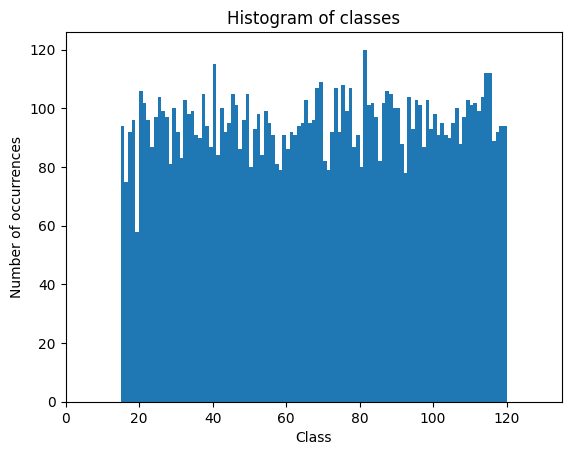

In [3]:
import matplotlib.pyplot as plt

plt.hist(df.classification, bins=135, range=(0, 135))
plt.xlim(0, 135)
plt.title("Histogram of classes")
plt.xlabel("Class")
plt.ylabel("Number of occurrences")
plt.show()

We can see that some classes never occur in dataset. Let's investigate it.

In [4]:
zeros = [i for i in range(135) if i not in df.classification.to_list()]
print(zeros)
print([map_combinations[i] for i in zeros])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134]
[(1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (9, 0, 1), (9, 0, 2), (9, 0, 3), (9, 0, 4), (9, 0, 5), (9, 1, 2), (9, 1, 3), (9, 1, 4), (9, 1, 5), (9, 2, 3), (9, 2, 4), (9, 2, 5), (9, 3, 4), (9, 3, 5), (9, 4, 5)]


Combination $(1, 0, 1)$ translates to label $(1, 9, 0, 0, 0, 0)$. When we search for $1$ or $9$ in our `labels.csv` file we see that really no row has those two numbers. So in reality our images have at least 2 shapes of one kind and at most 8 shapes of the other.

## Table 

In [9]:
table = pd.DataFrame(
    {col: df[col].value_counts().reindex(range(1, 10), fill_value=0)
     for col in df.columns[1:7]}
)
md = table.to_markdown("eda_table.md")
print(table)

   squares  circles   up  right  down  left
1        0        0    0      0     0     0
2      415      486  501    480   500   484
3      475      480  477    464   479   468
4      493      463  464    484   467   500
5      458      487  465    494   456   480
6      492      508  462    489   470   450
7      463      486  456    466   508   464
8      483      500  494    477   487   425
9        0        0    0      0     0     0


In [6]:
table.values.sum()

np.int64(20000)

In [7]:
def odliczanie(n):
    print(n)
    if n == 0:
        pass
    else:
        odliczanie(n-1)

In [8]:
odliczanie(1000000000000000000)

1000000000000000000
999999999999999999
999999999999999998
999999999999999997
999999999999999996
999999999999999995
999999999999999994
999999999999999993
999999999999999992
999999999999999991
999999999999999990
999999999999999989
999999999999999988
999999999999999987
999999999999999986
999999999999999985
999999999999999984
999999999999999983
999999999999999982
999999999999999981
999999999999999980
999999999999999979
999999999999999978
999999999999999977
999999999999999976
999999999999999975
999999999999999974
999999999999999973
999999999999999972
999999999999999971
999999999999999970
999999999999999969
999999999999999968
999999999999999967
999999999999999966
999999999999999965
999999999999999964
999999999999999963
999999999999999962
999999999999999961
999999999999999960
999999999999999959
999999999999999958
999999999999999957
999999999999999956
999999999999999955
999999999999999954
999999999999999953
999999999999999952
999999999999999951
999999999999999950
999999999999999949
99999999999

RecursionError: maximum recursion depth exceeded while calling a Python object